In [1]:
pip install pandas matplotlib


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import sqlite3

conn = sqlite3.connect('sales_data.db')
cursor = conn.cursor()

cursor.execute('''
    CREATE TABLE IF NOT EXISTS sales (
        id INTEGER PRIMARY KEY,
        product TEXT,
        quantity INTEGER,
        price REAL
    )
''')

sample_data = [
    ('Apples', 10, 1.2),
    ('Bananas', 5, 0.8),
    ('Oranges', 8, 1.5),
    ('Apples', 15, 1.2),
    ('Bananas', 10, 0.8),
    ('Oranges', 5, 1.5),
]

cursor.executemany('INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)', sample_data)

conn.commit()
conn.close()

print("Database created and sample data inserted.")


Database created and sample data inserted.


In [3]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
conn = sqlite3.connect('sales_data.db')


In [6]:
query = """
SELECT 
    product, 
    SUM(quantity) AS total_qty, 
    SUM(quantity * price) AS revenue 
FROM sales 
GROUP BY product
"""

df = pd.read_sql_query(query, conn)
print(df)


   product  total_qty  revenue
0   Apples         25     30.0
1  Bananas         15     12.0
2  Oranges         13     19.5


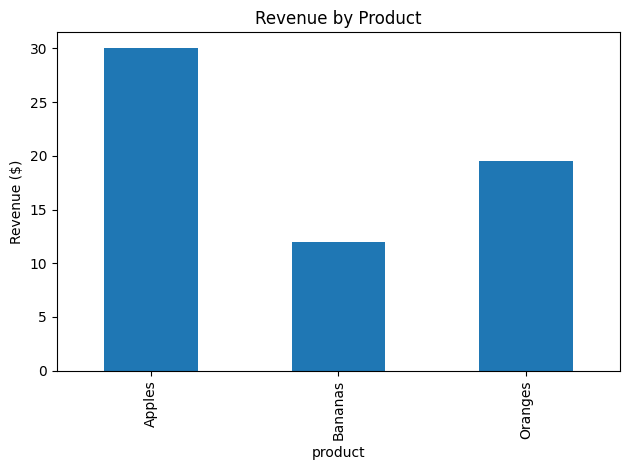

In [7]:
df.plot(kind='bar', x='product', y='revenue', title='Revenue by Product', legend=False)
plt.ylabel("Revenue ($)")
plt.tight_layout()
plt.savefig("sales_chart.png")  
plt.show() 
